# Interface graphique

## Reprise du code de la première partie

In [1]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X = mnist.data

In [4]:
y = np.array(mnist.target)
y=y.astype(int)

In [5]:
#X_train, X_test = X[:60000], X[60000:]
#y_train, y_test = y[:60000], y[60000:]

In [6]:
scaler.fit(X)
scaled = scaler.transform(X)

In [7]:
clf_scaled = SGDClassifier()
clf_scaled.fit(scaled, y)

SGDClassifier()

## Réaliser l'interface graphique

Importer les modules nécéssaires :

In [8]:
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import matplotlib.pyplot as plt

La fonction de prédiction du chiffre :

In [9]:
def predict_digit(img):
    #Changer la taille de l'image à 28x28 pixels
    img = img.resize((28,28))
    #Convertir l'image en grayscale
    img = img.convert('L')
    img = np.array(img)
    #Normaliser l'image et la montrer en console
    img = img*(-1) + 255
    plt.imshow(img, cmap="binary")
    plt.axis("off")
    plt.show()
    #transformer l'image en array à une dimension pour la prédiction
    img = img.reshape(-1)
    #prédire la classe
    res = clf_scaled.predict([img])
    print(res)
    return res

Créer l'interface Tkinter :

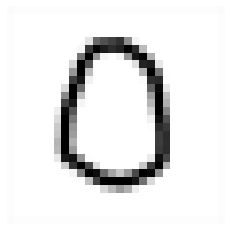

[0]


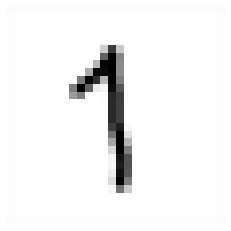

[1]


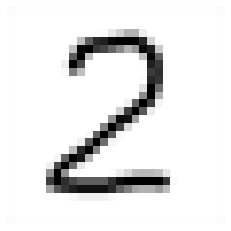

[3]


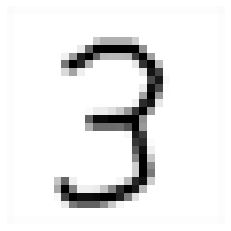

[3]


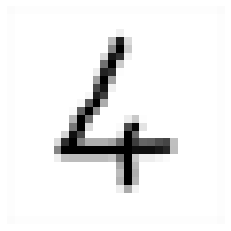

[6]


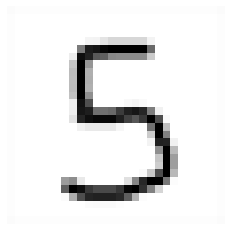

[3]


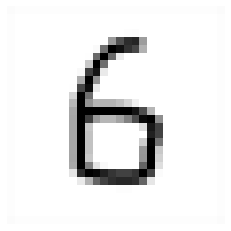

[6]


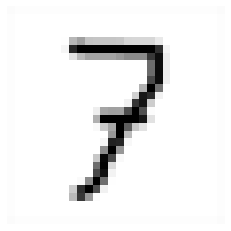

[3]


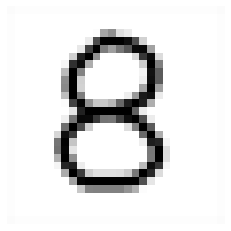

[3]


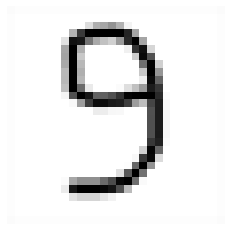

[3]


In [10]:
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Créer les éléments
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="En attente..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Identifier", command = self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Effacer", command = self.clear_all)

        # Créer la grille
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #Associer la fonction de dessin au bouton gauche de la souris
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        #Récupérer les informations de l'image et les convertir
        HWND = self.canvas.winfo_id()
        rect = win32gui.GetWindowRect(HWND)
        im = ImageGrab.grab(rect)

        #Utiliser la fonction de prédiction
        digit = predict_digit(im)
        digit = str(*digit)
        self.label.configure(text= str(f"Le chiffre\nest : {digit}."))

    def draw_lines(self, event):
        #Dessiner en créant des ovales noirs de rayon de 8 pixels
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

#Appeler la fonction
App()
mainloop()

Le modèle fonctionne, même si certains chiffres (5, 7, 9...) ont plus tendance à être mal identifiés, par rapport à l'identification des données originales de mnist. Le 3 revient trop souvent comme résultat.